In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Function get_data

In [5]:
!ls

 images		     paul.jfif
 Javier_2.ipynb      Pierre-Ethnicity.ipynb
 Javier_age.ipynb   'Pierre-Ethnicity simple model.ipynb'
 Paul_age.ipynb     'Pierre - Original dataset transformation.ipynb'
 Paul_Gender.ipynb


In [40]:
url = '../raw_data/age_gender.csv'
df = pd.read_csv(url)

In [41]:
df.head(5)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


# Data exploration

In [42]:
num_pixels = len(df['pixels'][0].split(" "))
img_height = int(np.sqrt(len(df['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(df['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [43]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

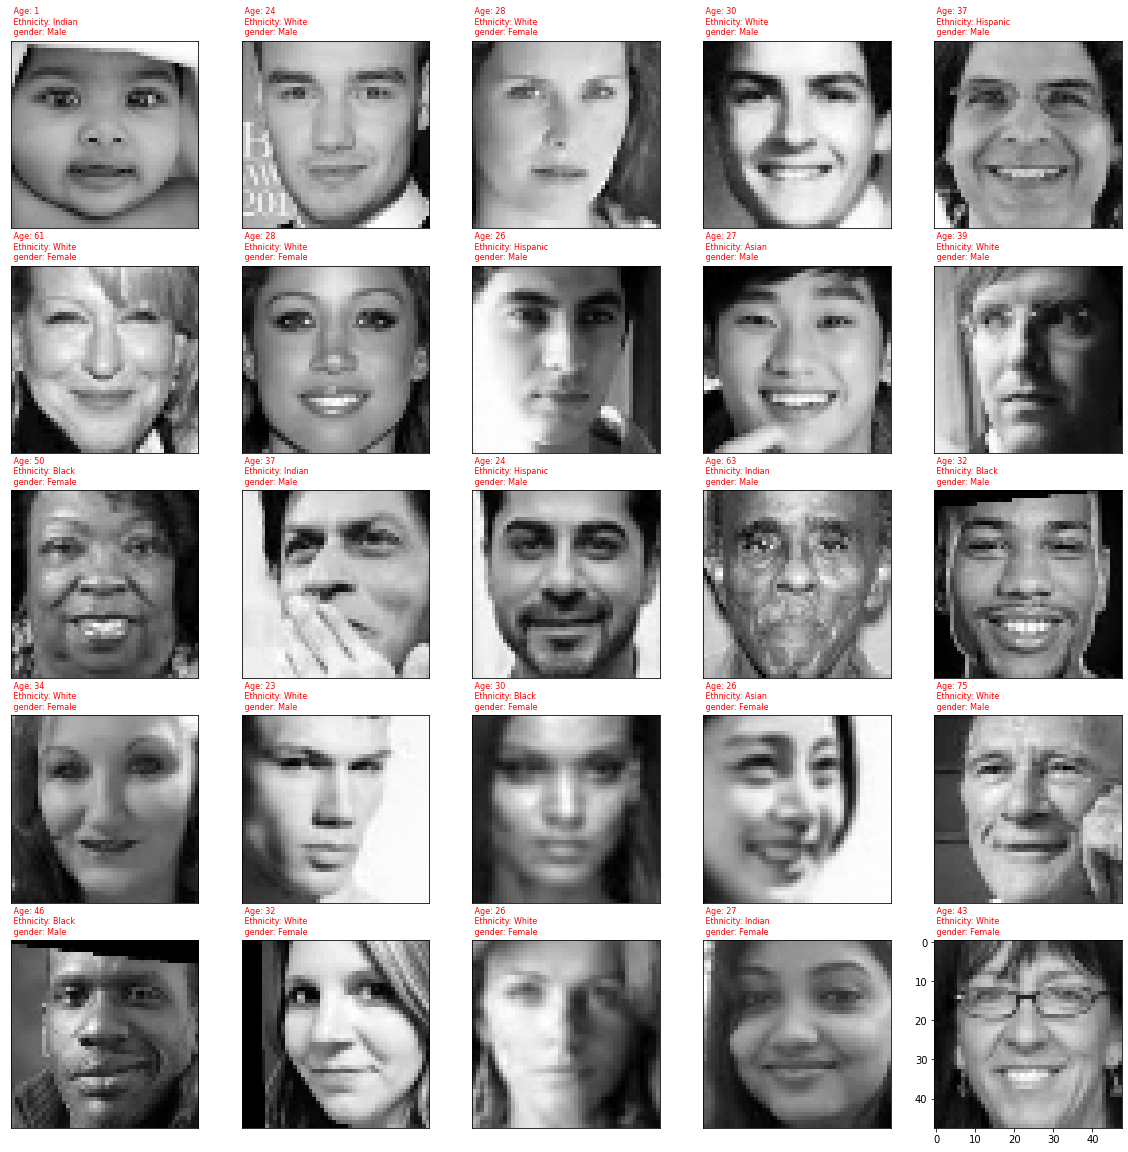

In [44]:
plt.figure(figsize=(20, 20))

for i in range(25):  
    index = np.random.randint(0, len(df))
    plt.xticks([])
    plt.yticks([])   
    plt.grid(False)
    plt.subplot(5, 5, i+1)
    plt.imshow(df['pixels'].iloc[index].reshape(48, 48),"gray")
    plt.title(' Age: {}\n Ethnicity: {}\n gender: {}'.format(df['age'].iloc[index], {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Hispanic"}[df['ethnicity'].iloc[index]], {0:"Male", 1:"Female"}[df['gender'].iloc[index]]),loc="left",color='red',fontsize = 8)

plt.show()

## Récuperer les images à partir des pixels et les stocker dans un dossier

In [45]:
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.figure(figsize=(12,5))
palette = sns.color_palette('Paired', 10)

<Figure size 864x360 with 0 Axes>

In [46]:
import os
import os.path
import csv
from PIL import Image


# Ethnicity labels
ETHNICITIES = { 
    0: "White", 
    1: "Black",
    2: "Asian",
    3: "Indian",
    4: "Hispanic"
}

# Gender labels
GENDERS = { 
    0: "Male", 
    1: "Female"
}


# Directory to store the images
base_path = os.path.join(os.path.curdir, 'images')
labeled_paths = {}
if not os.path.isdir(base_path):
    os.makedirs(base_path)

# Sort images in directories by ethnicity then gender
for ek, ev in ETHNICITIES.items():
    for gk, gv in GENDERS.items():
        labeled_path = os.path.join(base_path, ev, gv)
        labeled_paths.setdefault(ek,{})[gk] = labeled_path
        if not os.path.isdir(labeled_path):
            os.makedirs(labeled_path)


with open(url,"r") as fp:
    # Read dataset as dict entries
    csv_reader = csv.DictReader(fp)

    for row in csv_reader:
        age = int(row['age'])
        ethnicity = int(row['ethnicity'])
        gender = int(row['gender'])

        # Extract pixel string (string list of grayscale integers sep by space)
        pixels = bytearray([int(px) for px in row['pixels'].split(' ')])

        # Create new Image of resolution 48*48 from pixels
        #   I assumed a square image, so I computed
        #     len(pixels)**.5  # = 48.0
        #   to get the resolution.
        img = Image.frombytes('L', (48,48), bytes(pixels))

        # Name of file to write to
        #file_name = row['img_name']
        # or name file with labels: age_ethnicity_gender-original.jpg
        file_name = f"{age:03}_{ethnicity}_{gender}-{row['img_name'].split('.')[0]}.jpg"

        # The path to save the image to
        file_dir = labeled_paths.get(ethnicity, {}).get(gender, base_path)
        file_path = os.path.join(file_dir, file_name)

        # Write out the Image file
        img.save(file_path)
        # or save without JPEG compression
        #img.save(file_path + ".png", 'png', compress_level=0)

## add labels

In [47]:
# df['gender'] = df['gender'].map({0: "Male", 
#                                  1: "Female"
#                                 })

df['ethnicity'] = df['ethnicity'].map({ 
                                        0: "White", 
                                        1: "Black",
                                        2: "Asian",
                                        3: "Indian",
                                        4: "Hispanic"
                                    })

In [48]:
df

,age,ethnicity,gender,img_name,pixels
0,1,Asian,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,Asian,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,Asian,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,Asian,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,Asian,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."
...,...,...,...,...,...
23700,99,White,1,20170120221920654.jpg.chip.jpg,"[127.0, 100.0, 94.0, 81.0, 77.0, 77.0, 74.0, 9..."
23701,99,Black,1,20170120134639935.jpg.chip.jpg,"[23.0, 28.0, 32.0, 35.0, 42.0, 47.0, 68.0, 85...."
23702,99,Asian,1,20170110182418864.jpg.chip.jpg,"[59.0, 50.0, 37.0, 40.0, 34.0, 19.0, 30.0, 101..."
23703,99,Asian,1,20170117195405372.jpg.chip.jpg,"[45.0, 108.0, 120.0, 156.0, 206.0, 197.0, 140...."


## explore the dataset

## describe/info gender feature

In [49]:
df['gender'].describe()

count    23705.000000
mean         0.477283
std          0.499494
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  object
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(2), object(3)
memory usage: 926.1+ KB


## count the gender 

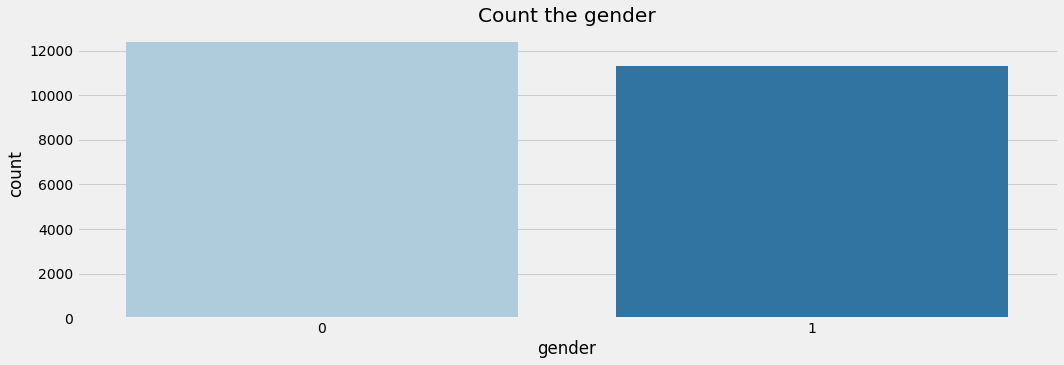

In [51]:
sns.catplot(x="gender", kind="count", palette=palette, data=df, height=5, aspect=3);
sns.despine()
plt.title('Count the gender');
plt.show()

## count ethinicties

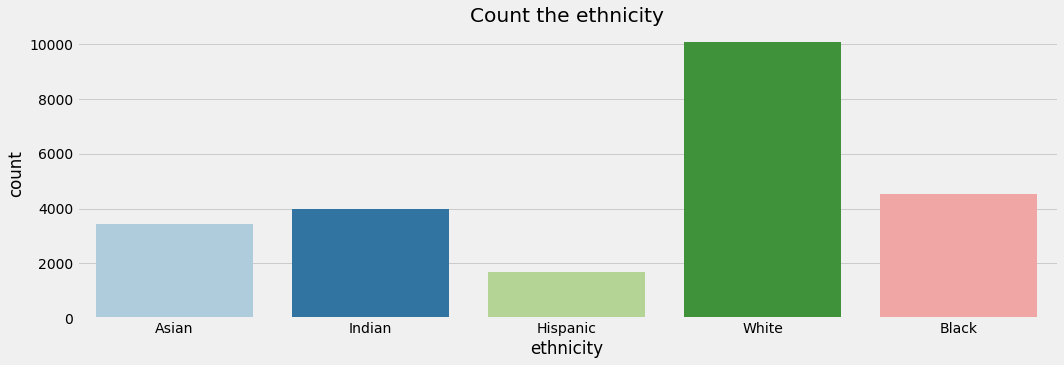

In [52]:
sns.catplot(x="ethnicity", kind="count", palette=palette, data=df, height=5, aspect=3);
sns.despine()
plt.title('Count the ethnicity');
plt.show()

# Evaluation metrics

##  Precision

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Others metrics for information : Recall and F1

# Baseline Model 

In [54]:
from sklearn.dummy import DummyClassifier

In [55]:
X = df.drop('gender', axis=1)
y = df['gender']

In [56]:
X

,age,ethnicity,img_name,pixels
0,1,Asian,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,Asian,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,Asian,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,Asian,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,Asian,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."
...,...,...,...,...
23700,99,White,20170120221920654.jpg.chip.jpg,"[127.0, 100.0, 94.0, 81.0, 77.0, 77.0, 74.0, 9..."
23701,99,Black,20170120134639935.jpg.chip.jpg,"[23.0, 28.0, 32.0, 35.0, 42.0, 47.0, 68.0, 85...."
23702,99,Asian,20170110182418864.jpg.chip.jpg,"[59.0, 50.0, 37.0, 40.0, 34.0, 19.0, 30.0, 101..."
23703,99,Asian,20170117195405372.jpg.chip.jpg,"[45.0, 108.0, 120.0, 156.0, 206.0, 197.0, 140...."


In [57]:
y

0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [60]:
X = np.array(df['pixels'].tolist())
X.shape

(23705, 2304)

In [61]:
X = np.reshape(X, (-1, 48, 48,1))
X = X/255

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
X_train.shape

(16593, 48, 48, 1)

In [64]:
y_train.shape

(16593,)

In [25]:
baseline_model = DummyClassifier(strategy="prior") # Baseline : predict method always returns the most frequent class label in the observed y argument passed to fit
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

NameError: name 'DummyClassifier' is not defined

# First Model 

In [30]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Reshape,Flatten,MaxPooling2D,Conv2D,Dropout

In [84]:
model_gender = Sequential()
es = EarlyStopping(verbose=0, patience=5)

In [85]:

model_gender.add(Conv2D(64,(3,3),activation='relu',padding = "same",input_shape=(48,48,1)))
model_gender.add(MaxPooling2D(2,2))

model_gender.add(Conv2D(32,(3,3),activation='relu'))
model_gender.add(MaxPooling2D(2,2))

model_gender.add(Conv2D(64,(3,3),activation='relu'))
model_gender.add(MaxPooling2D(2,2))

model_gender.add(Flatten())
model_gender.add(Dense(1,activation='sigmoid'))

model_gender.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 22, 22, 32)        18464     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)        

In [8]:
import tensorflow as tf

2022-06-06 16:05:57.677836: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-06 16:05:57.680415: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [87]:
model_gender.compile(optimizer='adam' ,loss='BinaryCrossentropy',
                     metrics=['accuracy'])

In [88]:
 model_gender.fit(X_train, y_train,
          epochs=50, 
          batch_size=32, 
          verbose=1,
          validation_data = (X_test, y_test),
          callbacks= [es])

Epoch 1/50
519/519 [==============================] - 27s 50ms/step - loss: 0.5610 - accuracy: 0.7440 - val_loss: 0.4204 - val_accuracy: 0.8140
Epoch 2/50
519/519 [==============================] - 27s 52ms/step - loss: 0.4054 - accuracy: 0.8170 - val_loss: 0.4064 - val_accuracy: 0.8265
Epoch 3/50
519/519 [==============================] - 27s 52ms/step - loss: 0.3685 - accuracy: 0.8384 - val_loss: 0.3611 - val_accuracy: 0.8396
Epoch 4/50
519/519 [==============================] - 27s 52ms/step - loss: 0.3397 - accuracy: 0.8516 - val_loss: 0.3683 - val_accuracy: 0.8337
Epoch 5/50
519/519 [==============================] - 25s 48ms/step - loss: 0.3239 - accuracy: 0.8606 - val_loss: 0.3467 - val_accuracy: 0.8532
Epoch 6/50
519/519 [==============================] - 18s 34ms/step - loss: 0.3095 - accuracy: 0.8646 - val_loss: 0.3979 - val_accuracy: 0.8286
Epoch 7/50
519/519 [==============================] - 18s 35ms/step - loss: 0.3019 - accuracy: 0.8716 - val_loss: 0.3361 - val_accuracy:

In [89]:
print(model_gender.evaluate(X_test, y_test, verbose=0))

[0.3693571090698242, 0.8537682890892029]


In [112]:
X = df.drop('gender', axis=1)
y = df['gender']
       
X = np.array(df['pixels'].tolist())
X = np.reshape(X, (-1, 48, 48,1))
       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [113]:
model_gender_2 = Sequential()
es = EarlyStopping(verbose=0, patience=5)

In [114]:
model_gender_2.add(Conv2D(32,(3,3),activation='relu',padding = "same",input_shape=(48,48,1)))
model_gender_2.add(MaxPooling2D(2,2))

model_gender_2.add(Conv2D(16,(3,3),activation='relu'))
model_gender_2.add(MaxPooling2D(2,2))

model_gender_2.add(Conv2D(16,(3,3),activation='relu'))
model_gender_2.add(MaxPooling2D(2,2))

model_gender_2.add(Flatten())

model_gender_2.add(Dense(1,activation='sigmoid'))

model_gender_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 22, 22, 16)        4624      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 11, 11, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 9, 9, 16)          2320      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 4, 4, 16)       

In [115]:
model_gender_2.compile(optimizer='adam' ,loss='BinaryCrossentropy',
                     metrics=['accuracy'])

In [116]:
 history_2 = model_gender_2.fit(X_train, y_train,
          epochs=50, 
          batch_size=32, 
          verbose=1,
          validation_data = (X_test, y_test),
          callbacks= [es])

Epoch 1/50
519/519 [==============================] - 18s 33ms/step - loss: 0.7264 - accuracy: 0.6713 - val_loss: 0.5394 - val_accuracy: 0.7341
Epoch 2/50
519/519 [==============================] - 17s 32ms/step - loss: 0.4934 - accuracy: 0.7677 - val_loss: 0.4773 - val_accuracy: 0.7812
Epoch 3/50
519/519 [==============================] - 13s 25ms/step - loss: 0.4437 - accuracy: 0.7969 - val_loss: 0.4539 - val_accuracy: 0.7930
Epoch 4/50
519/519 [==============================] - 16s 31ms/step - loss: 0.4145 - accuracy: 0.8150 - val_loss: 0.4087 - val_accuracy: 0.8226
Epoch 5/50
519/519 [==============================] - 16s 31ms/step - loss: 0.3991 - accuracy: 0.8214 - val_loss: 0.4097 - val_accuracy: 0.8190
Epoch 6/50
519/519 [==============================] - 16s 31ms/step - loss: 0.3841 - accuracy: 0.8310 - val_loss: 0.3925 - val_accuracy: 0.8349
Epoch 7/50
519/519 [==============================] - 16s 31ms/step - loss: 0.3708 - accuracy: 0.8389 - val_loss: 0.4057 - val_accuracy:

In [124]:
print(model_gender_2.evaluate(X_test, y_test, verbose=0))

[0.4136142134666443, 0.8207255601882935]


In [11]:
X = df.drop('gender', axis=1)
y = df['gender']
       
X = np.array(df['pixels'].tolist())
X = np.reshape(X, (-1, 48, 48,1))
       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

ValueError: cannot reshape array of size 23705 into shape (48,48,1)

In [65]:
model_gender_3 = Sequential()
es = EarlyStopping(verbose=0, patience=10)

In [66]:
model_gender_3.add(Conv2D(64,(3,3),activation='relu',padding = "same",input_shape=(48,48,1)))
model_gender_3.add(MaxPooling2D(2,2))

model_gender_3.add(Conv2D(32,(3,3),activation='relu'))
model_gender_3.add(MaxPooling2D(2,2))

model_gender_3.add(Conv2D(64,(3,3),activation='relu'))
model_gender_3.add(MaxPooling2D(2,2))

model_gender_3.add(Conv2D(64,(3,3),activation='relu'))
model_gender_3.add(MaxPooling2D(2,2))

model_gender_3.add(Flatten())

model_gender_3.add(Dense(1,activation='sigmoid'))

model_gender_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 64)        

In [67]:
model_gender_3.compile(optimizer='adam' ,loss='BinaryCrossentropy',
                     metrics=['accuracy'])

In [68]:
history_3 = model_gender_3.fit(X_train, y_train,
          epochs=50, 
          batch_size=32, 
          verbose=1,
          validation_data = (X_test, y_test),
          callbacks= [es])

Epoch 1/50
519/519 [==============================] - 31s 58ms/step - loss: 0.5262 - accuracy: 0.7255 - val_loss: 0.3817 - val_accuracy: 0.8301
Epoch 2/50
519/519 [==============================] - 32s 61ms/step - loss: 0.3542 - accuracy: 0.8425 - val_loss: 0.3316 - val_accuracy: 0.8498
Epoch 3/50
519/519 [==============================] - 32s 62ms/step - loss: 0.3139 - accuracy: 0.8620 - val_loss: 0.3151 - val_accuracy: 0.8577
Epoch 4/50
519/519 [==============================] - 30s 57ms/step - loss: 0.2899 - accuracy: 0.8745 - val_loss: 0.3200 - val_accuracy: 0.8600
Epoch 5/50
519/519 [==============================] - 30s 59ms/step - loss: 0.2690 - accuracy: 0.8845 - val_loss: 0.2907 - val_accuracy: 0.8730
Epoch 6/50
519/519 [==============================] - 30s 57ms/step - loss: 0.2512 - accuracy: 0.8926 - val_loss: 0.3299 - val_accuracy: 0.8552
Epoch 7/50
519/519 [==============================] - 31s 60ms/step - loss: 0.2393 - accuracy: 0.8997 - val_loss: 0.2762 - val_accuracy:

In [149]:
print(model_gender_3.evaluate(X_test, y_test, verbose=0))

[0.40685003995895386, 0.8585489392280579]


In [35]:
#plot Accuracy

def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

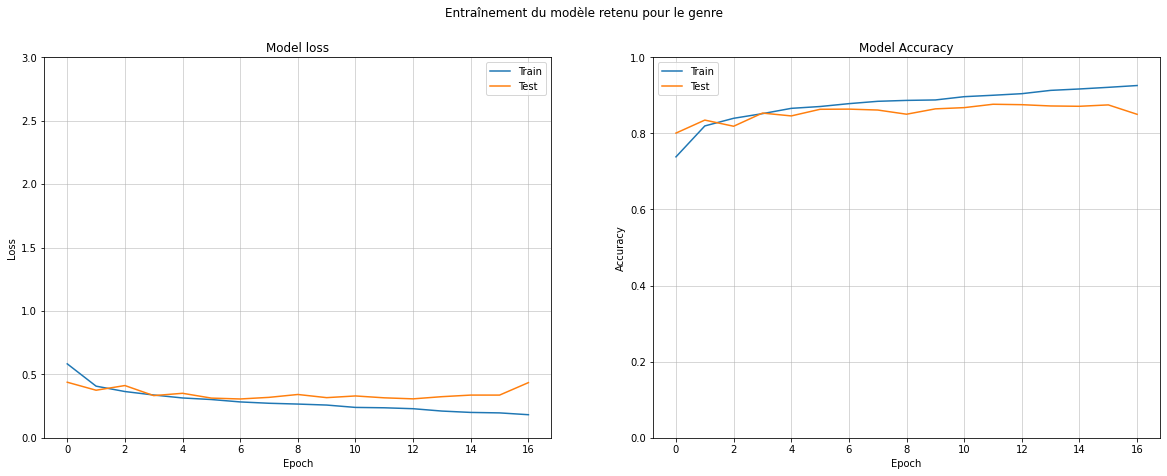

In [36]:
plot_loss_accuracy(history_3, title="Entraînement du modèle retenu pour le genre")

In [152]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

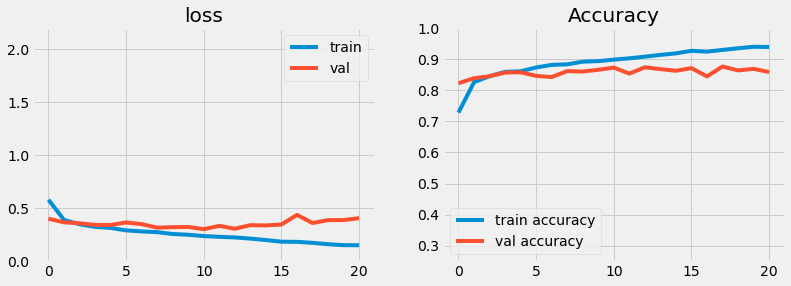

In [153]:
plot_history(history_3)
plt.show()

In [165]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

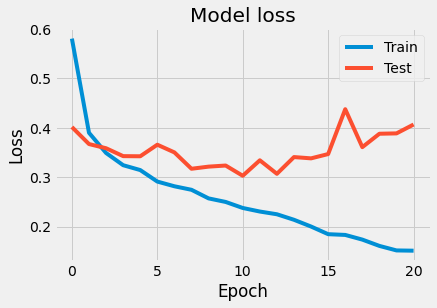

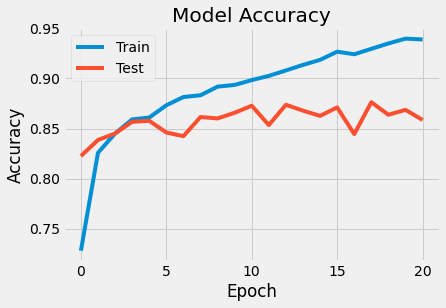

In [166]:
plot_loss_accuracy(history_3)

1

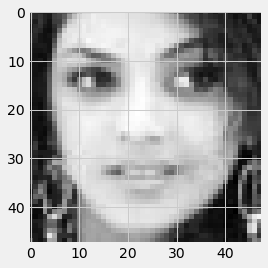

In [178]:
n=243
plt.imshow(X_test[n], cmap='gray');
y_test.iloc[n]

In [179]:
try_inp = np.expand_dims(X_test[n], axis=0)
model_gender_3.predict(try_inp)[0,0]

0.99999976

0

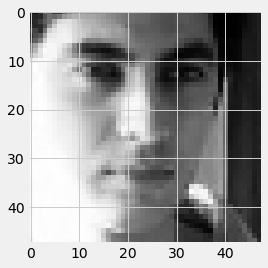

In [159]:
n=148
plt.imshow(X_test[n], cmap='gray');
y_test.iloc[n]

In [160]:
try_inp = np.expand_dims(X_test[n], axis=0)
model_gender_3.predict(try_inp)[0,0]

0.3834641

0

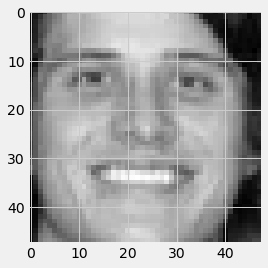

In [162]:
n=500
plt.imshow(X_test[n], cmap='gray');
y_test.iloc[n]

In [163]:
try_inp = np.expand_dims(X_test[n], axis=0)
model_gender_3.predict(try_inp)[0,0]

0.02594769

In [174]:
y_pred = model_gender_3.predict(X_test)

In [8]:
import tensorflow as tf
from PIL import Image
import numpy as np
import pandas as pd
img_data = np.random.random(size=(100, 100, 3))


In [9]:
img_data

array([[[0.94570168, 0.12647956, 0.34470814],
        [0.32567551, 0.11841883, 0.87121526],
        [0.7989507 , 0.24386114, 0.95853843],
        ...,
        [0.08250713, 0.86708463, 0.94923958],
        [0.99517091, 0.83487168, 0.8076749 ],
        [0.46098511, 0.66212402, 0.55715906]],

       [[0.43816713, 0.35874297, 0.15460663],
        [0.32721062, 0.7379721 , 0.78463018],
        [0.08048882, 0.18704429, 0.42346052],
        ...,
        [0.67215344, 0.63011897, 0.01967939],
        [0.19257231, 0.91234205, 0.09957105],
        [0.78145401, 0.03757576, 0.4701928 ]],

       [[0.2712398 , 0.88078526, 0.58275564],
        [0.22384683, 0.99931182, 0.08600411],
        [0.42110882, 0.14845079, 0.86378432],
        ...,
        [0.05482018, 0.20256232, 0.0827833 ],
        [0.17859388, 0.4559895 , 0.84596478],
        [0.78863047, 0.51642657, 0.69658157]],

       ...,

       [[0.60752582, 0.40511679, 0.26077661],
        [0.68590861, 0.71233196, 0.93749568],
        [0.60767995, 0